In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ruta1= '/content/drive/MyDrive/PYTHON/M5 MACHINE LEARNING/Proyecto/churn.csv'
data1 = pd.read_csv(ruta1)
data1

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


# **1. Realizar análisis exploratorio del dataset**

In [4]:
# prompt: info de tipo de datos

data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [5]:
# prompt: Revisar si los campos de la columna Customer ID son únicos o hay repetidos

# Check for duplicate 'Customer ID' values
duplicate_customer_ids = data1[data1.duplicated(subset=['Customer ID'], keep=False)]

if duplicate_customer_ids.empty:
  print("No duplicate 'Customer ID' values found.")
else:
  print("Duplicate 'Customer ID' values found:")
duplicate_customer_ids


No duplicate 'Customer ID' values found.


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason


In [6]:
data1.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [7]:
# prompt: Aumentar en data1 una columna con el nombre Churn Value donde se muestre con 1 si el cliente  en Customer Status está con estado Churned  y con 0 si el cliente  tiene una tipología diferente a Churned

data1['Churn Value'] = data1['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)


In [8]:
# prompt: tipos de customer status y cuántos hay en cada uno y sus porcentajes

customer_status_counts = data1['Customer Status'].value_counts()
print(customer_status_counts)

customer_status_percentages = (customer_status_counts / len(data1)) * 100
customer_status_percentages


Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64


,count
Customer Status,
Stayed,67.016896
Churned,26.536987
Joined,6.446117


In [9]:
# prompt: Contar cuántos hay en la columna Under 30 con YES y con NO y sus porcentajes

under_30_counts = data1['Under 30'].value_counts()
print(under_30_counts)

under_30_percentages = (under_30_counts / len(data1)) * 100
under_30_percentages


Under 30
No     5642
Yes    1401
Name: count, dtype: int64


,count
Under 30,
No,80.107909
Yes,19.892091


In [10]:
#Mostrar elementos únicos de la columna quarter
data1['Quarter'].nunique()

1

In [11]:
# prompt: contar por Customer Satus y Under 30 cuántos hay? y sus porcentajes

# Group by 'Customer Status' and 'Under 30' and count occurrences
status_under30_counts = data1.groupby(['Customer Status', 'Under 30']).size().unstack(fill_value=0)

# Calculate percentages
status_under30_percentages = status_under30_counts.div(status_under30_counts.sum(axis=1), axis=0) * 100

# Display the counts and percentages
print("Counts:\n", status_under30_counts)
print("\nPercentages:\n", status_under30_percentages)


Counts:
 Under 30           No  Yes
Customer Status           
Churned          1565  304
Joined            355   99
Stayed           3722  998

Percentages:
 Under 30                No        Yes
Customer Status                      
Churned          83.734617  16.265383
Joined           78.193833  21.806167
Stayed           78.855932  21.144068


In [12]:
#Values en offers

#Agregar No Offer Reported en valores vacíos en columna Offer
data1['Offer']=data1['Offer'].fillna('No Offer Reported')
data1['Offer'].value_counts()

,count
Offer,
No Offer Reported,3877
Offer B,824
Offer E,805
Offer D,602
Offer A,520
Offer C,415


In [13]:
# Ver valores únicos en Internet Type
data1['Internet Type'].unique()

# Transformar vacíos en "No Internet"
data1['Internet Type'] = data1['Internet Type'].fillna('No Internet')
data1['Internet Type'].value_counts()

,count
Internet Type,
Fiber Optic,3035
DSL,1652
No Internet,1526
Cable,830


In [14]:
#Eliminar Internet Service para no duplicar valores
data1 = data1.drop(columns=['Internet Service'])

In [15]:
# # prompt: Aumentar en data1 una columna con el nombre "Intervalo de Permanencia" en el que tendrá las siguientes etiquetas según el resultado de la columna "Tenure in Months ": Menor a un año si es menor a 12, De uno a dos años si se encuentre entre 12 y 24, Mayor a 3 años si está entre 25 y 72

# # Define the function to categorize tenure
# def categorize_tenure(tenure):
#   if tenure < 12:
#     return 'Menor a un año'
#   elif 12 <= tenure <= 24:
#     return 'De uno a dos años'
#   elif 25 <= tenure <= 72:
#     return 'Mayor a 3 años'
#   else:
#     return 'Otro'  # Handle cases outside the defined ranges

# # Apply the function to create the new column
# data1['Intervalo de Permanencia'] = data1['Tenure in Months'].apply(categorize_tenure)

# # Display the updated DataFrame
# data1


In [16]:
# prompt: info de data1

data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [17]:
# prompt: Eliminar las columnas: State, Country, Satisfaction Score, Population y Referred a Friend y Customer ID, Churn Reason, Churn Category, Churn Score, Churn Label, Customer Status,  Paperless Billing, Avg Monthly Long Distance Charges, Senior Citizen, Dependents, Zip Code , Latitude, Longitude

data1 = data1.drop(columns=['State', 'Country', 'Satisfaction Score', 'Population', 'Referred a Friend', 'Customer ID','Churn Label', 'Churn Reason', 'Churn Category', 'Churn Score', 'Customer Status', 'Paperless Billing', 'Avg Monthly Long Distance Charges', 'Senior Citizen', 'Dependents', 'Zip Code', 'Latitude', 'Longitude','City','Quarter'])
#Eliminación adicional de UNDER30
data1 = data1.drop(columns=['Under 30'])

data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       7043 non-null   object 
 1   Age                          7043 non-null   int64  
 2   Married                      7043 non-null   object 
 3   Number of Dependents         7043 non-null   int64  
 4   Number of Referrals          7043 non-null   int64  
 5   Tenure in Months             7043 non-null   int64  
 6   Offer                        7043 non-null   object 
 7   Phone Service                7043 non-null   object 
 8   Multiple Lines               7043 non-null   object 
 9   Internet Type                7043 non-null   object 
 10  Avg Monthly GB Download      7043 non-null   int64  
 11  Online Security              7043 non-null   object 
 12  Online Backup                7043 non-null   object 
 13  Device Protection 

In [18]:
#Ver todos los valores únicos de todas las filas

for column in data1.columns:
    unique_values = data1[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print()

Valores únicos en la columna 'Gender':
['Male' 'Female']

Valores únicos en la columna 'Age':
[78 74 71 80 72 76 66 70 77 65 67 68 69 79 75 73 37 19 31 23 38 21 29 61
 27 20 56 51 48 32 34 41 30 26 62 64 45 53 63 42 24 54 39 43 50 22 40 47
 60 52 55 59 49 58 25 28 33 44 57 46 36 35]

Valores únicos en la columna 'Married':
['No' 'Yes']

Valores únicos en la columna 'Number of Dependents':
[0 1 3 2 5 4 6 7 8 9]

Valores únicos en la columna 'Number of Referrals':
[ 0  1  6  2  4  3  7  5  8  9 10 11]

Valores únicos en la columna 'Tenure in Months':
[ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]

Valores únicos en la columna 'Offer':
['No Offer Reported' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']

Valores únicos en la columna 'Phone Service':
['No' 'Yes']

Valores únicos en la columna 'Multiple Lines':
['No' 

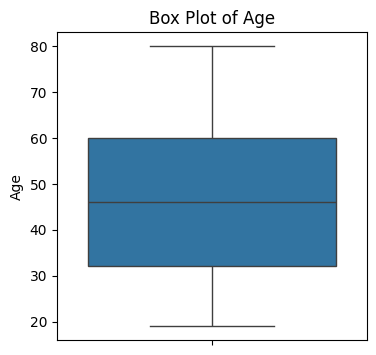

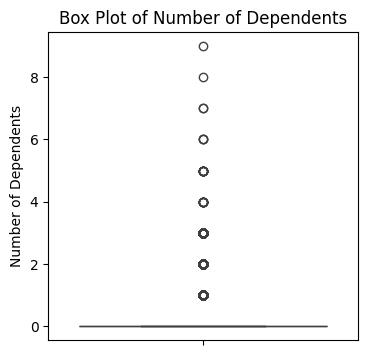

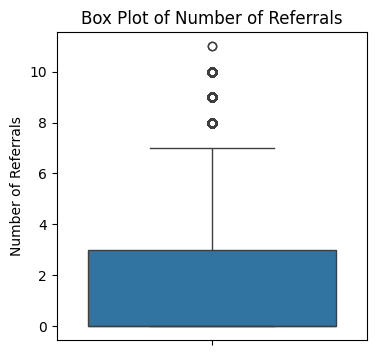

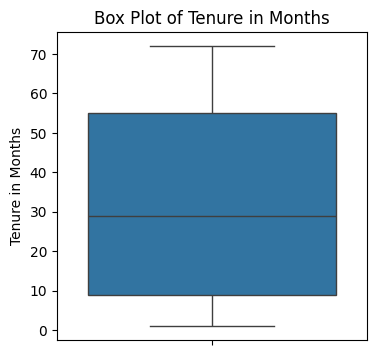

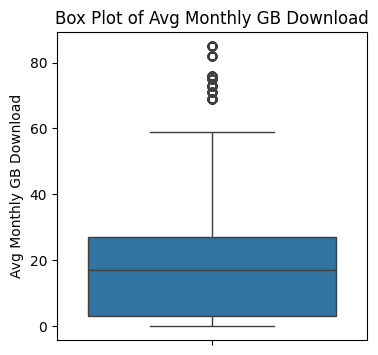

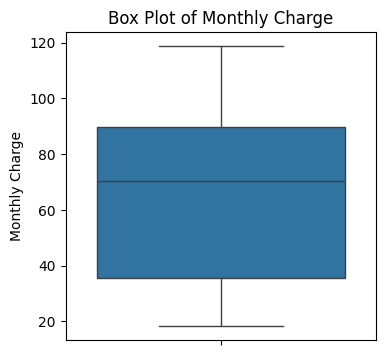

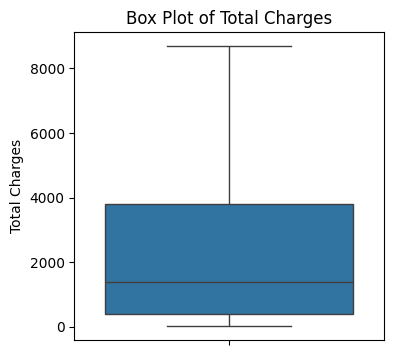

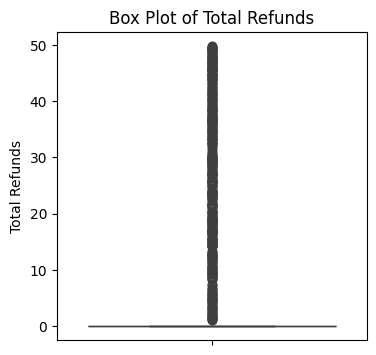

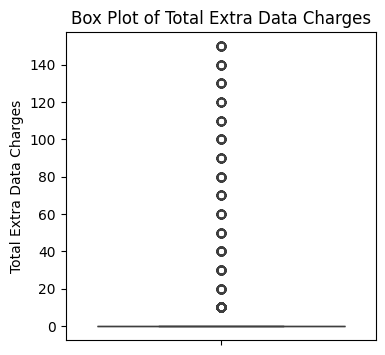

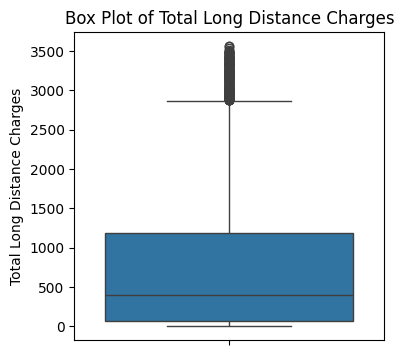

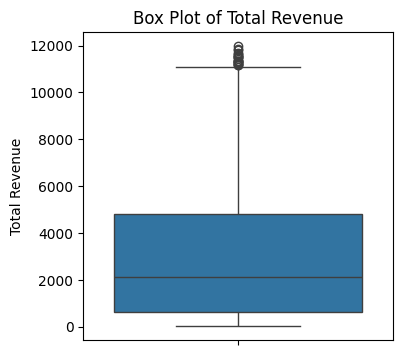

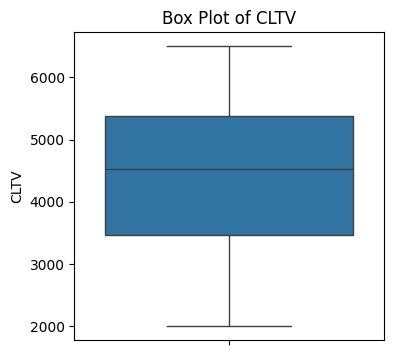

In [19]:
#Ver en diferentes diagrama de cajas cada variables numericas como Age, Number of Dependents, Number of Referrals, Tenure in Months, Avg Monthly GB Download
for column in ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months',
               'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
               'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue', 'CLTV']:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=data1[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


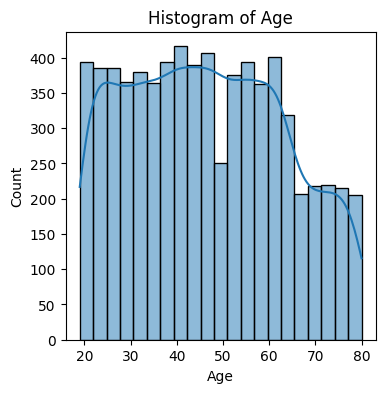

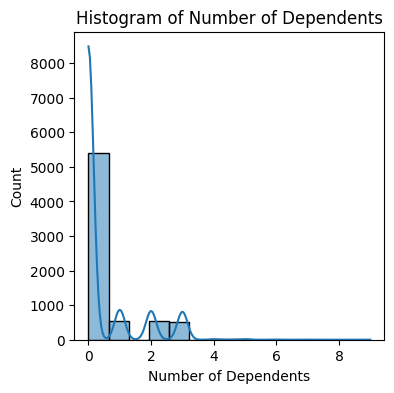

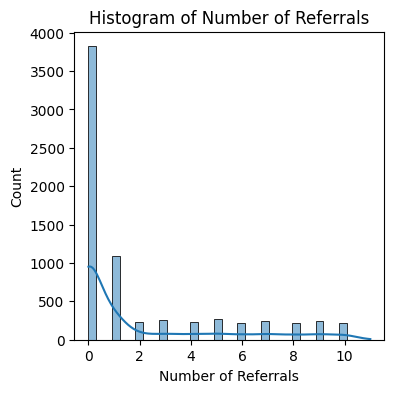

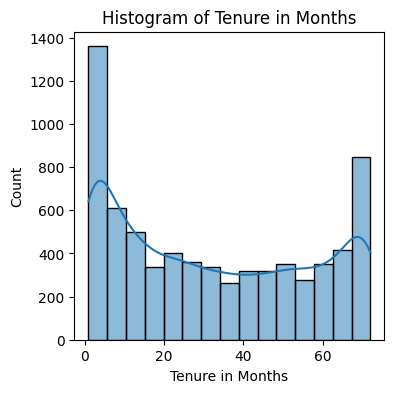

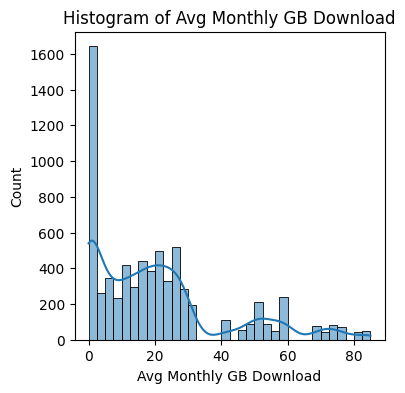

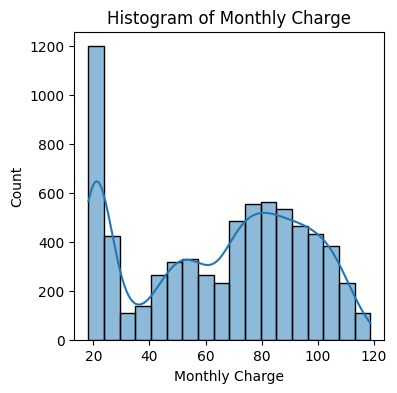

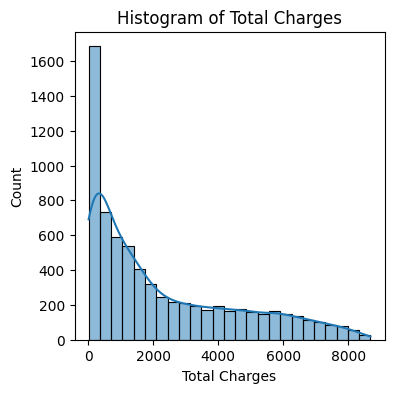

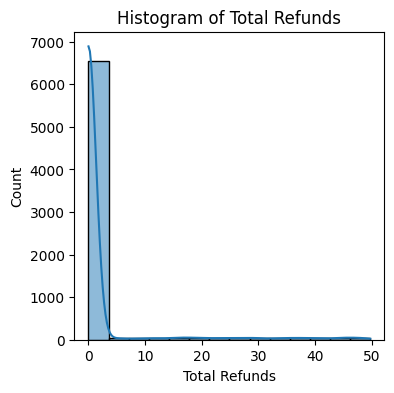

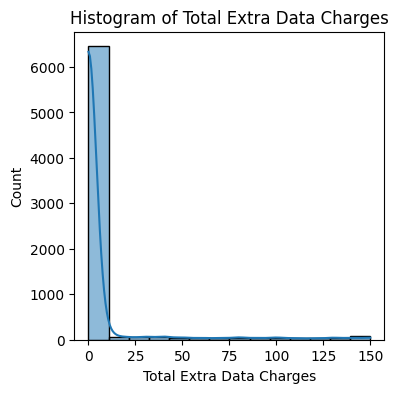

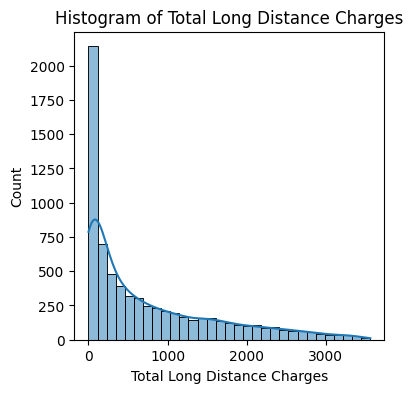

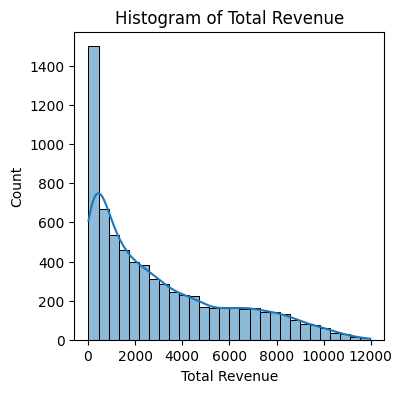

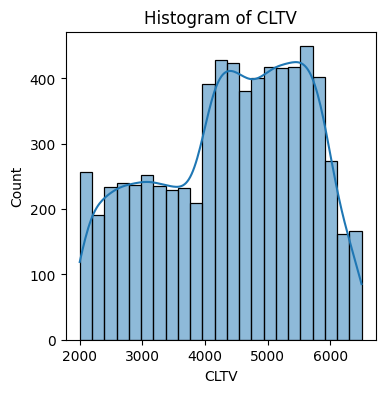

In [20]:
# Histogramas de cada variables numericas como Age, Number of Dependents, Number of Referrals, Tenure in Months, Avg Monthly GB Download
for column in ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months',
               'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
               'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue', 'CLTV']:
    plt.figure(figsize=(4, 4))
    sns.histplot(data1[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [21]:
# Value counts de cada variables numericas como Age, Number of Dependents, Number of Referrals, Tenure in Months, Avg Monthly GB Download
for column in ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months',
               'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
               'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue', 'CLTV']:
    print(f"Value counts of {column}:")
    print(data1[column].value_counts())
    print()

Value counts of Age:
Age
42    156
47    153
40    150
44    148
23    146
     ... 
80     66
66     63
78     63
67     61
72     58
Name: count, Length: 62, dtype: int64

Value counts of Number of Dependents:
Number of Dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
8       1
9       1
Name: count, dtype: int64

Value counts of Number of Referrals:
Number of Referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
4      236
2      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64

Value counts of Tenure in Months:
Tenure in Months
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

Value counts of Avg Monthly GB Download:
Avg Monthly GB Download
0     1526
19     220
27     199
30     193
59     192
26     191
23     179
22     172
21     171
18     164
13     164
17     155
16     155
20     151
24   

In [22]:
#Todos los nombres de las columnas
data1.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'CLTV', 'Churn Value'],
      dtype='object')

In [23]:
# Definición de las variables categóricas (Mejor rendimiento de modelo)
categorical_features = ['Gender', 'Married', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method', 'Churn Value']

# Conversión de cada columna a tipo 'category'
for col in categorical_features:
    data1[col] = data1[col].astype('category')

# Verificación de los tipos de datos de las columnas categóricas
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gender                       7043 non-null   category
 1   Age                          7043 non-null   int64   
 2   Married                      7043 non-null   category
 3   Number of Dependents         7043 non-null   int64   
 4   Number of Referrals          7043 non-null   int64   
 5   Tenure in Months             7043 non-null   int64   
 6   Offer                        7043 non-null   category
 7   Phone Service                7043 non-null   category
 8   Multiple Lines               7043 non-null   category
 9   Internet Type                7043 non-null   category
 10  Avg Monthly GB Download      7043 non-null   int64   
 11  Online Security              7043 non-null   category
 12  Online Backup                7043 non-null   category
 13  Dev

In [24]:
data1['Churn Value'].value_counts()

,count
Churn Value,
0,5174
1,1869


# Data Spliting

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Split datos train and test

X = data1.drop(["Churn Value"], axis=1)  # Características
y = data1["Churn Value"]  # Variable objetivo

# Dividir los datos en train y test (70% train, 30% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=9)

# Ahora dividir el conjunto temporal (X_temp, y_temp) en validación (val) y test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=9)

In [27]:
len(X_train),len(X_val),len(X_test)

(4930, 1056, 1057)

In [28]:
len(y_train),len(y_val),len(y_test)

(4930, 1056, 1057)

In [29]:
#Ver cuantos churn hay en x_train
y_train.value_counts()

,count
Churn Value,
0,3620
1,1310


## Encoding

In [30]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00


In [31]:
#from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

In [32]:
## Modelo con escalamientos numéricos

#Separar columnas por transformaciones a realizar
Genero_col  = ['Gender']
YesNo_cols = ['Married', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
onehot_cols = ['Offer', 'Internet Type', 'Contract', 'Payment Method']
dependent_col = ['Number of Dependents']
robust_cols = ['Number of Referrals', 'Avg Monthly GB Download','Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue',]
standard_cols = ['Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges', 'CLTV']


#Definir funciones transformadoras
# Función personalizada para convertir 'female'/'male' a 1/0
def gender_transform(x):
    return np.where(x == 'Female', 1, 0)

# Función personalizada para convertir 'yes'/'no' a 1/0
def yes_no_transform(x):
    return np.where(x == 'Yes', 1, 0)

# Función personalizada para Number of Referrals
def dependent_transform(x):
    return np.where(x >= 4, 4, x)

# Variables categóricas para OneHotEncoder (aún no transformadas, más de 2 categorías)


ct = ColumnTransformer(transformers=[('genero', FunctionTransformer(gender_transform), Genero_col),
                                     ('yes_no', FunctionTransformer(yes_no_transform), YesNo_cols),
                                     ('OneHotEncoding', OneHotEncoder(), onehot_cols),
                                     ('dependent', FunctionTransformer(dependent_transform), dependent_col),
                                     ('robust', RobustScaler(), robust_cols),
                                     ('standard', StandardScaler(), standard_cols)
                                     ],
                       remainder='passthrough')

# Ajustamos y transformamos el training set
X_train_encoded = ct.fit_transform(X_train)

#Ajustar y transformar variable y
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)



In [33]:
#Funcion para recuperar nombres de las variables X

def get_feature_names_from_column_transformer(ct, X_train):
    output_features = []

    for name, transformer, columns in ct.transformers_:
        if transformer == 'drop':
            continue
        elif transformer == 'passthrough':
            output_features.extend(columns)
        elif isinstance(transformer, FunctionTransformer):
            # Para los transformadores personalizados, puedes agregar un nombre genérico o inferirlo
            output_features.extend([f"{col}" for col in columns])
        elif isinstance(transformer, OneHotEncoder):
            # Para OneHotEncoder, usa get_feature_names_out() si está disponible
            ohe = transformer
            ohe.fit(X_train[columns])  # Ajusta en las columnas correspondientes
            output_features.extend(ohe.get_feature_names_out(columns))
        elif isinstance(transformer, (StandardScaler, RobustScaler)):
            # Para los scalers, simplemente usamos los nombres de las columnas
            output_features.extend(columns)
        else:
            # En caso de que se añadan otros transformadores no contemplados
            output_features.extend(columns)

    return output_features

In [34]:
    # Obtener los nombres de columnas
    feature_names = get_feature_names_from_column_transformer(ct, X_train)
    feature_names

    #Reconstruir DataFrame
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)

    X_train_encoded

,Gender,Married,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,...,Avg Monthly GB Download,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Age,Tenure in Months,Monthly Charge,Total Charges,CLTV
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.260870,0.00,0.0,0.503303,0.090569,0.493108,-0.165373,-0.349928,-0.330576,0.253185
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.00,0.0,0.439756,0.436201,-0.570667,0.120249,0.672761,0.338304,1.279837
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.826087,0.00,0.0,-0.257703,-0.021563,0.256713,-0.287782,0.351820,-0.160728,1.327922
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.695652,14.22,0.0,1.045248,0.132709,0.256713,1.099524,-1.515627,-0.514806,0.567845
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.217391,0.00,0.0,-0.135511,0.730395,1.675079,1.099524,0.599593,1.165591,0.745843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.565217,0.00,0.0,-0.102965,-0.076433,-0.156977,-0.206176,-0.401478,-0.338507,-1.323490
4926,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,-0.565217,0.00,0.0,-0.290999,0.337564,1.556882,0.120249,1.193252,0.518071,-0.921940
4927,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,2.391304,0.00,0.0,-0.188747,-0.002830,-1.102554,-0.287782,0.468223,-0.160308,0.718848
4928,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.695652,0.00,0.0,0.422448,-0.074730,0.611305,0.079446,-1.307764,-0.595412,1.217411


In [35]:
print("Forma del conjunto de entrenamiento codificado:", X_train_encoded.shape)
print("Primeras 5 filas transformadas:\n", X_train_encoded[:5])

Forma del conjunto de entrenamiento codificado: (4930, 40)
Primeras 5 filas transformadas:
    Gender  Married  Phone Service  Multiple Lines  Online Security  \
0     0.0      0.0            1.0             0.0              0.0   
1     0.0      0.0            1.0             0.0              0.0   
2     0.0      1.0            1.0             0.0              0.0   
3     0.0      0.0            1.0             0.0              0.0   
4     0.0      1.0            1.0             0.0              1.0   

   Online Backup  Device Protection Plan  Premium Tech Support  Streaming TV  \
0            1.0                     0.0                   1.0           0.0   
1            0.0                     1.0                   0.0           1.0   
2            1.0                     0.0                   0.0           0.0   
3            0.0                     0.0                   0.0           0.0   
4            1.0                     1.0                   0.0           0.0   

   Str

# **2. Modelamiento Random Forest**

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [37]:
#Aplicar modelo RandomForest
model1 = RandomForestClassifier(n_estimators=50, max_features= 20, random_state=4, class_weight="balanced")
model1.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(class_weight='balanced', max_features=20,
                       n_estimators=50, random_state=4)

In [38]:
#Obtener accuracy del modelo con el set de entrenamiento
y_train_pred = model1.predict(X_train_encoded)
accuracy_train = accuracy_score(y_train_encoded, y_train_pred)
print("Accuracy en el conjunto de entrenamiento:", accuracy_train)

Accuracy en el conjunto de entrenamiento: 0.9995943204868154


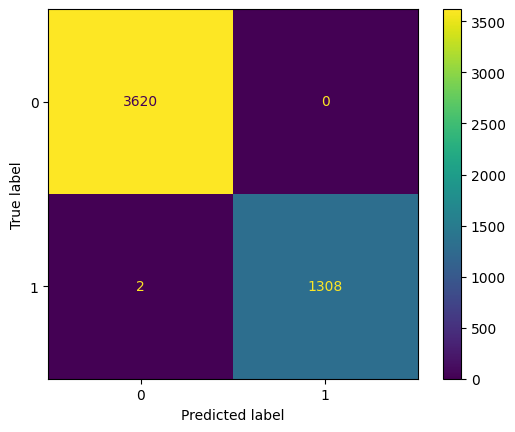

In [39]:
#Obtener gráfica de matriz de confusión
ConfusionMatrixDisplay.from_estimator(model1, X_train_encoded, y_train_encoded)

In [40]:
#Obtener y ver métricas de la data de entrenamiento
precision_train = precision_score(y_train_encoded, y_train_pred)
recall_train = recall_score(y_train_encoded, y_train_pred)
f1_train = f1_score(y_train_encoded, y_train_pred)

print("Métricas en el conjunto de entrenamiento:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

Métricas en el conjunto de entrenamiento:
Precision: 1.0
Recall: 0.9984732824427481
F1 Score: 0.9992360580595875


##Uso de RandomizedSearchCV para escoger mejores hiperparámetros


In [41]:
#Uso de RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [5, 10, 20],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=model1, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_encoded, y_train_encoded)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_features=20,
                                                    n_estimators=50,
                                                    random_state=4),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [42]:
best_model1 = random_search.best_estimator_

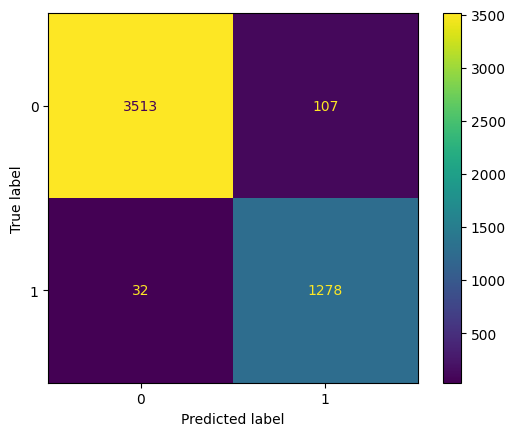

In [43]:
#Obtener gráfica de matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_model1, X_train_encoded, y_train_encoded)

In [44]:
#Obtener accuracy del modelo con el set de entrenamiento
y_train_pred_best = best_model1.predict(X_train_encoded)
accuracy_train_best = accuracy_score(y_train_encoded, y_train_pred_best)
print("Accuracy en el conjunto de entrenamiento:", accuracy_train_best)

Accuracy en el conjunto de entrenamiento: 0.9718052738336714


In [45]:
#Obtener y ver métricas de la data de entrenamiento
precision_train_best = precision_score(y_train_encoded, y_train_pred_best)
recall_train_best = recall_score(y_train_encoded, y_train_pred_best)
f1_train_best = f1_score(y_train_encoded, y_train_pred_best)

print("Métricas en el conjunto de entrenamiento:")
print("Precision:", precision_train_best)
print("Recall:", recall_train_best)
print("F1 Score:", f1_train_best)

Métricas en el conjunto de entrenamiento:
Precision: 0.9227436823104693
Recall: 0.9755725190839695
F1 Score: 0.9484230055658627


##Validación del modelo

In [46]:
#Validar modelo con data de validación
X_val_encoded = ct.transform(X_val)
X_val_encoded = pd.DataFrame(X_val_encoded, columns=feature_names)

y_val_encoded = label_encoder.transform(y_val)
y_val_pred = best_model1.predict(X_val_encoded)


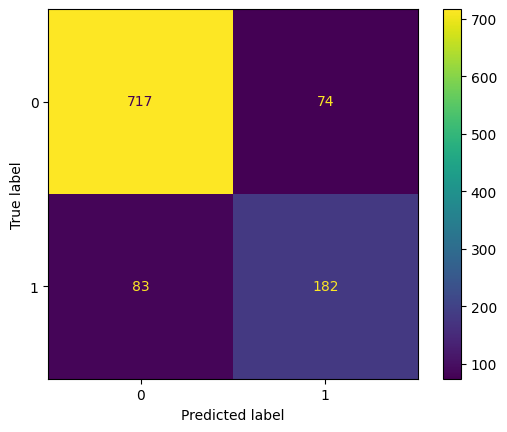

In [47]:
#Obtener gráfica de matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_model1, X_val_encoded, y_val_encoded)

In [48]:
#Obtener y ver métricas de la data de entrenamiento
precision_val = precision_score(y_val_encoded, y_val_pred)
recall_val = recall_score(y_val_encoded, y_val_pred)
f1_val = f1_score(y_val_encoded, y_val_pred)

print("Métricas en el conjunto de validación:")
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)

Métricas en el conjunto de validación:
Precision: 0.7109375
Recall: 0.6867924528301886
F1 Score: 0.6986564299424184


# **2.1 Modelamiento**

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [50]:
model2 = XGBClassifier(
    objective="binary:logistic",
    n_estimators=100,
    max_depth=20,
    max_leaves=10,
    subsample=0.6,
    colsample_bytree=0.4,
    colsample_bynode=0.9,
    scale_pos_weight=2.7633,
    random_state=1,
)

In [51]:
model2.fit(X_train_encoded, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.9,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [52]:
#Obtener accuracy del modelo con el set de entrenamiento
y_train_pred = model2.predict(X_train_encoded)
accuracy_train = accuracy_score(y_train_encoded, y_train_pred)
print("Accuracy en el conjunto de entrenamiento:", accuracy_train)

Accuracy en el conjunto de entrenamiento: 0.8791075050709939


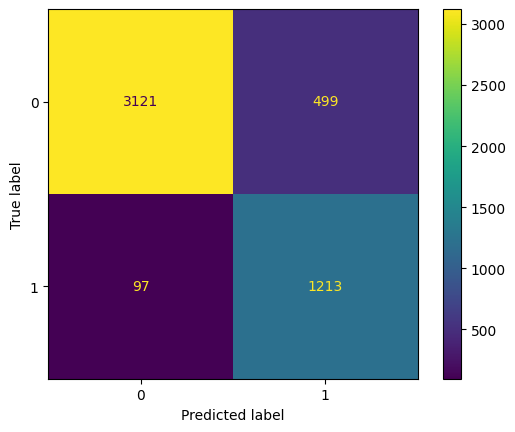

In [53]:
#Obtener gráfica de matriz de confusión
ConfusionMatrixDisplay.from_estimator(model2, X_train_encoded, y_train_encoded)

In [54]:
#Obtener y ver métricas de la data de entrenamiento
precision_train = precision_score(y_train_encoded, y_train_pred)
recall_train = recall_score(y_train_encoded, y_train_pred)
f1_train = f1_score(y_train_encoded, y_train_pred)

print("Métricas en el conjunto de entrenamiento:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

Métricas en el conjunto de entrenamiento:
Precision: 0.7085280373831776
Recall: 0.9259541984732824
F1 Score: 0.8027796161482462


In [55]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'scale_pos_weight': [2.7633]
}


In [56]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state= 1)

grid = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    scoring='f1',  # puedes cambiar a 'precision', 'recall' o 'roc_auc'
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid.fit(X_train_encoded, y_train_encoded)

print("Mejores parámetros encontrados:", grid.best_params_)
print("Mejor F1 Score:", grid.best_score_)


Fitting 3 folds for each of 486 candidates, totalling 1458 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:59:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 2.7633, 'subsample': 0.5}
Mejor F1 Score: 0.7104907101335834


In [57]:
# prompt: Guarda los parametros que salieron como resultado del GridSearchCV en una variable para poder crear un nuevo modelo

# Guarda los mejores parámetros en una variable
best_params = grid.best_params_

# Crea un nuevo modelo con los mejores parámetros
new_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=1)

# Entrena el nuevo modelo
new_model.fit(X_train_encoded, y_train_encoded)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:59:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

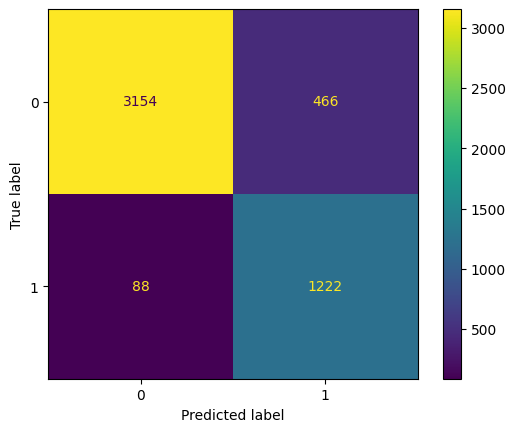

In [58]:
#Obtener gráfica de matriz de confusión
ConfusionMatrixDisplay.from_estimator(new_model, X_train_encoded, y_train_encoded)

In [59]:
#Obtener accuracy del modelo con el set de entrenamiento
y_train_pred_best = new_model.predict(X_train_encoded)
accuracy_train_best = accuracy_score(y_train_encoded, y_train_pred_best)
print("Accuracy en el conjunto de entrenamiento:", accuracy_train_best)

Accuracy en el conjunto de entrenamiento: 0.8876267748478702


##Validación del modelo 2

In [60]:
#Validar modelo con data de validación
X_val_encoded = ct.transform(X_val)
X_val_encoded = pd.DataFrame(X_val_encoded, columns=feature_names)

y_val_encoded = label_encoder.transform(y_val)
y_val_pred = new_model.predict(X_val_encoded)

#Obtener las probabilidades de decisión para mover umbral
probabilidades = new_model.predict_proba(X_val_encoded)[:, 1]

umbral = 0.30  # Aquí puedes ajustar el umbral
y_val_pred_umbral = (probabilidades >= umbral).astype(int)


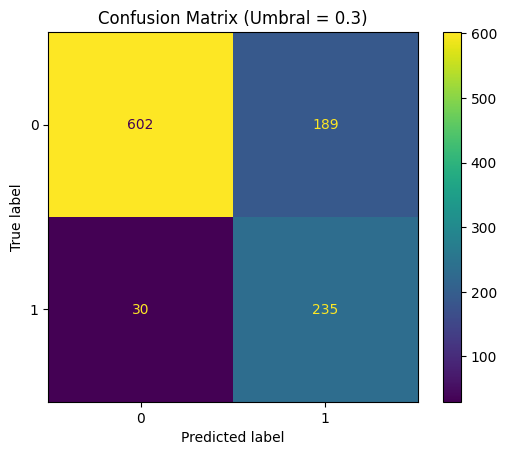

In [61]:
#Obtener gráfica de matriz de confusión
cm = confusion_matrix(y_val_encoded, y_val_pred_umbral)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title(f"Confusion Matrix (Umbral = {umbral})")
plt.show()

In [62]:
#Obtener y ver métricas de la data de entrenamiento
precision_val = precision_score(y_val_encoded, y_val_pred_umbral)
recall_val = recall_score(y_val_encoded, y_val_pred_umbral)
f1_val = f1_score(y_val_encoded, y_val_pred_umbral)

print("Métricas en el conjunto de validación:")
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)

Métricas en el conjunto de validación:
Precision: 0.5542452830188679
Recall: 0.8867924528301887
F1 Score: 0.6821480406386067


## Resultados con data test

In [63]:
#Validar modelo con data de validación
X_test_encoded = ct.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names)

y_test_encoded = label_encoder.transform(y_test)
y_test_pred = new_model.predict(X_test_encoded)

#Obtener las probabilidades de decisión para mover umbral
probabilidades = new_model.predict_proba(X_test_encoded)[:, 1]

umbral = 0.30  # Aquí puedes ajustar el umbral
y_test_pred= (probabilidades >= umbral).astype(int)

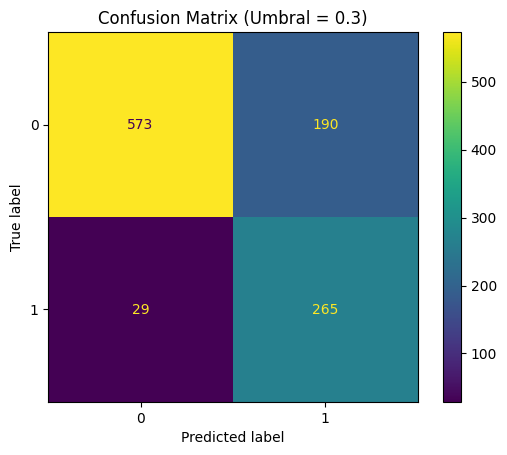

In [64]:
#Obtener gráfica de matriz de confusión
cm = confusion_matrix(y_test_encoded, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title(f"Confusion Matrix (Umbral = {umbral})")
plt.show()

In [65]:
#Obtener y ver métricas de la data de entrenamiento
precision_test = precision_score(y_test_encoded, y_test_pred)
recall_test = recall_score(y_test_encoded, y_test_pred)
f1_test = f1_score(y_test_encoded, y_test_pred)

print("Métricas en el conjunto de validación:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Métricas en el conjunto de validación:
Precision: 0.5824175824175825
Recall: 0.9013605442176871
F1 Score: 0.7076101468624834


# **2. Interpretabilidad y Explicabilidad **##

In [66]:
import shap

In [67]:
explainer = shap.Explainer(new_model)
shap_values = explainer.shap_values(X_test_encoded)

In [68]:
explanation = explainer(X_test_encoded)

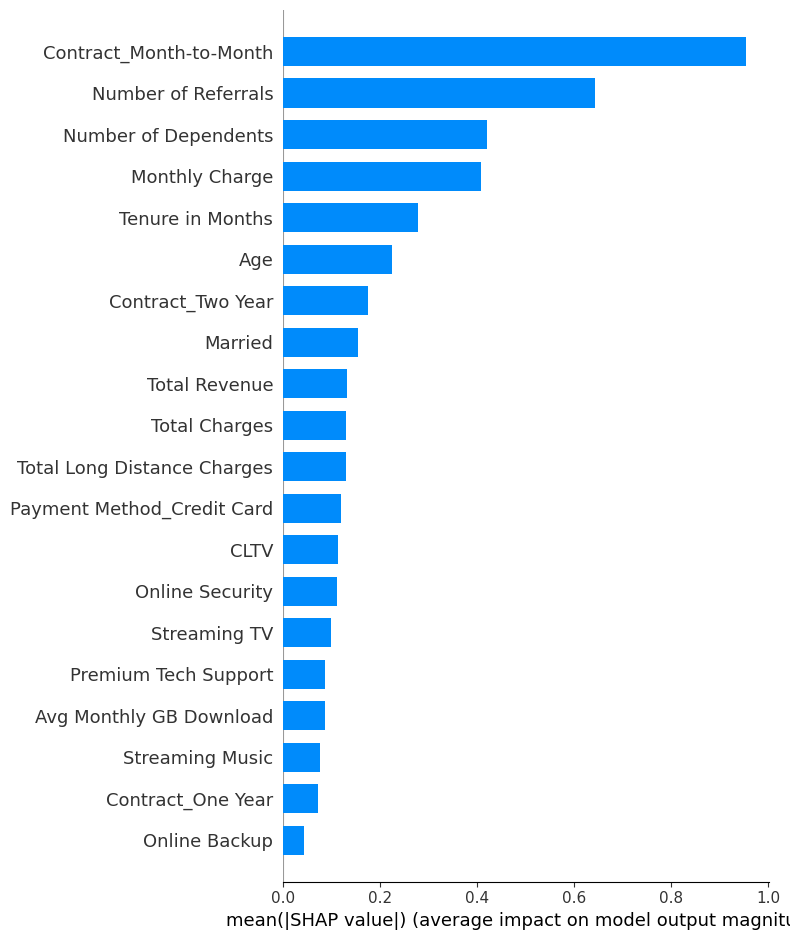

In [69]:
#Ver variables que contribuyen mas al modelo
plt.figure(figsize=(20,8))
shap.summary_plot(explanation, features=X_test_encoded, plot_type="bar")

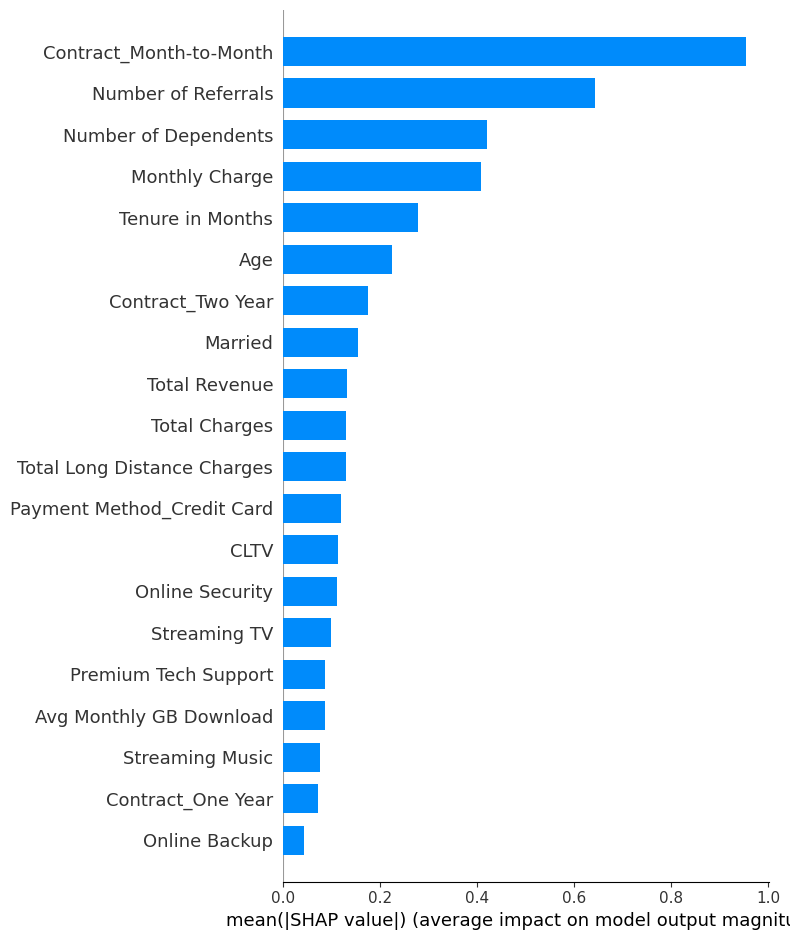

In [70]:
#Ver variables que contribuyen mas al modelo
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=X_test_encoded, plot_type="bar") # Set `interaction_index=None`

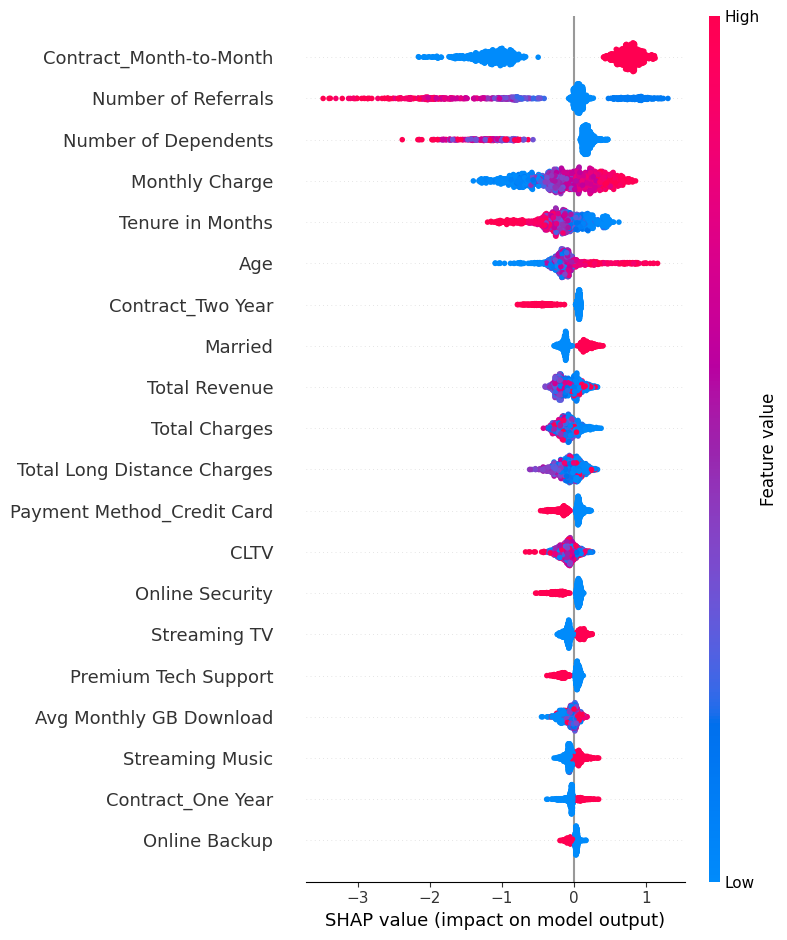

In [71]:
#Ver el comportamiento de la variable respuesta con respecto a las variables X

plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=X_test_encoded)


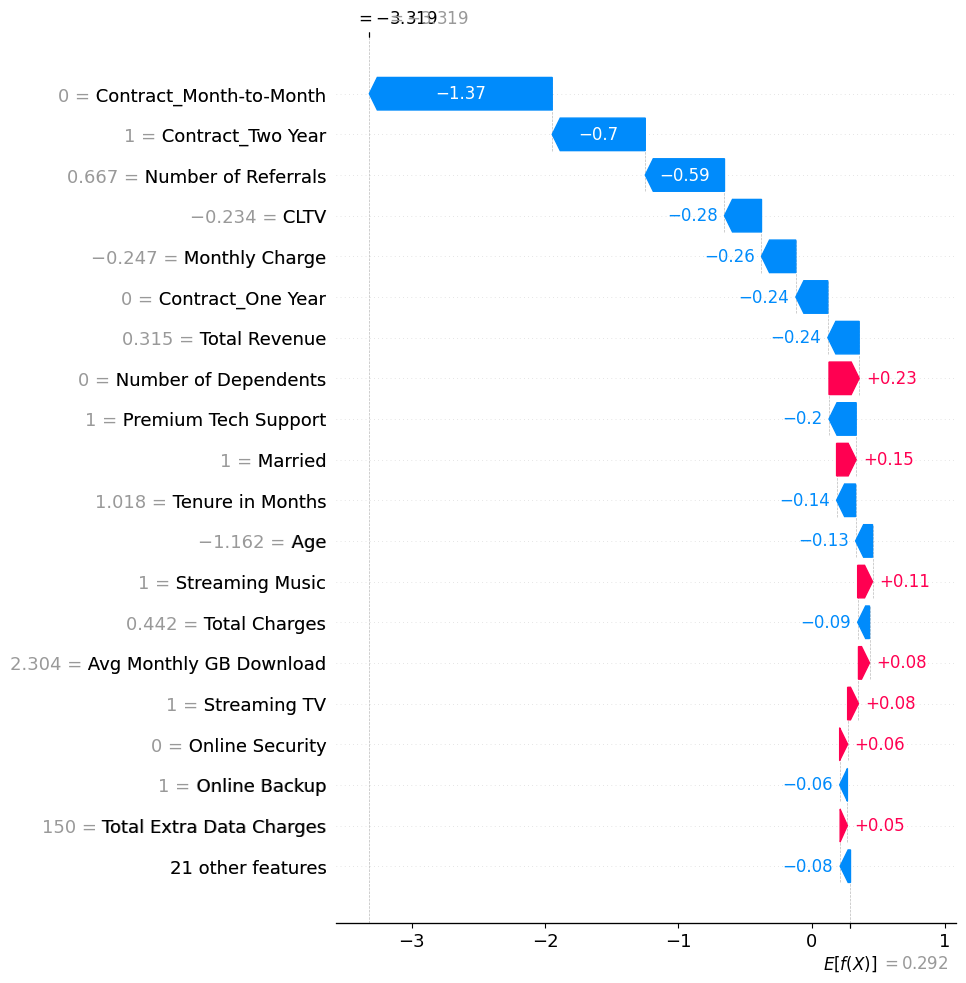

In [72]:
#Ver el comportamiento de casos individuales dentro del modelo
shap.plots.waterfall(explanation[4], max_display=20)